In [1]:
%load_ext autoreload
%autoreload 2

This tutorial shows how to use an MMContext Sentence Transformers model. It assumes you created a huggingface dataset, which contains the cell representations (either cell ids for numerical embeddings or cell sentences for text_only usage). Such datasets can be created with a pipeline available through the https://github.com/mengerj/adata_hf_datasets repo. If you instead want to start from an adata object, see the tutorial pretrained_inference.ipynb

In [61]:
import pandas as pd
from datasets import load_dataset

repo_name = "jo-mengr"
dataset_name = "hiha_100k_single_no_caption_v3"
split_name = "test"
label_key = "AIFI_L1"
batch_key = "batch_id"

In [41]:
dataset = load_dataset(f"{repo_name}/{dataset_name}")
test_dataset = dataset[split_name]

In [42]:
from sentence_transformers import SentenceTransformer

model_name = "jo-mengr/mmcontext-pubmedbert-geneformer-cxg_test"
model = SentenceTransformer(model_name, trust_remote_code=True)
data_type = "geneformer"
layer_key = f"X_{data_type}"
text_only = False
primary_cell_sentence = "cell_sentence_1"  # set to cell_sentence_2 for text based models

modules.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/283 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/98.8k [00:00<?, ?B/s]

mmcontextencoder.py:   0%|          | 0.00/69.8k [00:00<?, ?B/s]

file_utils.py:   0%|          | 0.00/25.6k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jo-mengr/mmcontext-pubmedbert-geneformer-cxg_test:
- file_utils.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


onehot.py:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jo-mengr/mmcontext-pubmedbert-geneformer-cxg_test:
- onehot.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


omicsencoder.py:   0%|          | 0.00/5.89k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jo-mengr/mmcontext-pubmedbert-geneformer-cxg_test:
- omicsencoder.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


adapters.py:   0%|          | 0.00/4.93k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jo-mengr/mmcontext-pubmedbert-geneformer-cxg_test:
- adapters.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jo-mengr/mmcontext-pubmedbert-geneformer-cxg_test:
- mmcontextencoder.py
- file_utils.py
- onehot.py
- omicsencoder.py
- adapters.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

0_MMContextEncoder/model.safetensors:   0%|          | 0.00/461M [00:00<?, ?B/s]

/Users/mengerj/repos/mmcontext/.venv/lib/python3.12/site-packages/ipykernel/iostream.py:154: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x167267bd0>
  self._event_pipes[threading.current_thread()] = event_pipe
/Users/mengerj/repos/mmcontext/.venv/lib/python3.12/site-packages/ipykernel/iostream.py:154: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x167265400>
  self._event_pipes[threading.current_thread()] = event_pipe
Loaded encoder was registered for 'geneformer' data. Call register_initial_embeddings() with compatible data before using it.


In [43]:
import os

from mmcontext.file_utils import load_test_adata_from_hf_dataset, subset_dataset_by_chunk

link_column = "share_link" if "share_link" in test_dataset.column_names else "adata_link"
adata, local_path = load_test_adata_from_hf_dataset(
    test_dataset,
    save_dir=f"../data/from_nxtcloud/{dataset_name}",
    link_column=link_column,
    zenodo_token=os.getenv("ZENODO_TOKEN"),
)
adata, dataset_sub = subset_dataset_by_chunk(adata, test_dataset)

Processing:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/mengerj/repos/mmcontext/.venv/lib/python3.12/site-packages/anndata/_io/specs/registry.py:281: OldFormatWarning: Element '/obsm/X_geneformer' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=iospec)
/Users/mengerj/repos/mmcontext/.venv/lib/python3.12/site-packages/anndata/_io/specs/registry.py:281: OldFormatWarning: Element '/obsm/X_geneformer-v1' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=iospec)
/Users/mengerj/repos/mmcontext/.venv/lib/python3.12/site-packages/anndata/_io/specs/registry.py:281: OldFormatWarning: Element '/obsm/X_gs10k' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=iospec)
/Users/mengerj/repos/mmcontext/.venv/lib/python3.12/site-packages/anndata/_io/specs/registry.py:281: OldFormatWarning: Element '/obsm/X_scvi_fm' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=i

In [44]:
test_dataset["sample_idx"]

['cfe6b50ea2e611eb91855e3d154f7c3f',
 'cdbe686e315811ee95297ae860542a53',
 '10f18c7c671711ed94878208818934b6',
 'd5e6e18c862c11eea4d2b6181e6e2ea7',
 'a453031caa7211ed811ebaba75e84c7d',
 '5a2e9956aa8411edbc55eac8c2b882ba',
 '467f8508fecf11eb8f22ce835a92b018',
 'c5acf8f8862a11eeb249aefb8bcfeb6c',
 '22f34e20872a11eba54aae2ad39eb13d',
 '8ce99e487b7111eb97356a557ecd1c7b',
 '2bd3317e230911ec9bc276af81d82c6c',
 '60e86f04bfdc11ebb3b5ba265ad50ebc',
 'a46937fccd3511eb88c7e2067416d204',
 '0829160c4e0211ecb6d06af08aaacff5',
 '97bdfd7276fe11eb89bbb265d7ce1040',
 '6b703620314d11ee80962a1f7c690213',
 '7a0ef3b260d111ed987552e10431fc03',
 'c4858838206511eb8a65be693a9b0e1c',
 '278e657eca0411ebbb136a0d2fbd39b2',
 'f0d0db0c50b811ecbd5a96ba759a0a5a',
 'ef98e62e8d0111eb894022587c8bf21f',
 'f78f043650be11eca58a4e8e993d3e95',
 '0815ce8a4e0211ecb6d06af08aaacff5',
 '877a0696e3fe11eb88346afc45235a84',
 'cf04f542648411eba49596c3cf2d6645',
 'e1fba4266f2d11eb9c86fece995c7c24',
 '6db45036749111eb9099229ae8d7075c',
 

In [45]:
adata.obs.index

Index(['cfe6b50ea2e611eb91855e3d154f7c3f', 'cdbe686e315811ee95297ae860542a53',
       '10f18c7c671711ed94878208818934b6', 'd5e6e18c862c11eea4d2b6181e6e2ea7',
       'a453031caa7211ed811ebaba75e84c7d', '5a2e9956aa8411edbc55eac8c2b882ba',
       '467f8508fecf11eb8f22ce835a92b018', 'c5acf8f8862a11eeb249aefb8bcfeb6c',
       '22f34e20872a11eba54aae2ad39eb13d', '8ce99e487b7111eb97356a557ecd1c7b',
       ...
       '74e3615648b611eabab7c676ab45cfca', '23a0eb5201cd11ec9bd81eda61cbfa79',
       '9538b2f06d6b11ebb628aa63b53ba83f', '946a749e230f11ecb89eb20ae7ecce12',
       '7a31da3a60d111ed987552e10431fc03', '68cc8742ecea11eb8ac2be83dc4baba1',
       '7573bd0ea2de11ebba15ae7e271d472f', 'a2c8244a8cfc11ebb4592ee9d1c560f8',
       'ef6bcc7e746111ebb005fab458a363f4', 'a1cba882230c11eb9e6016fcd894d086'],
      dtype='object', name='barcodes', length=92874)

In [46]:
if not text_only:
    token_df, _ = model[0].get_initial_embeddings_from_adata_link(
        dataset_sub,
        layer_key=layer_key,
        download_dir=f"../data/from_nxtcloud/{dataset_name}",
        axis="obs",
        link_column=link_column,
    )
    model[0].register_initial_embeddings(token_df, data_origin=data_type)

Processing:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/mengerj/repos/mmcontext/.venv/lib/python3.12/site-packages/anndata/_io/specs/registry.py:281: OldFormatWarning: Element '/obsm/X_geneformer' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=iospec)
/Users/mengerj/repos/mmcontext/.venv/lib/python3.12/site-packages/anndata/_io/specs/registry.py:281: OldFormatWarning: Element '/obsm/X_geneformer-v1' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=iospec)
/Users/mengerj/repos/mmcontext/.venv/lib/python3.12/site-packages/anndata/_io/specs/registry.py:281: OldFormatWarning: Element '/obsm/X_gs10k' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=iospec)
/Users/mengerj/repos/mmcontext/.venv/lib/python3.12/site-packages/anndata/_io/specs/registry.py:281: OldFormatWarning: Element '/obsm/X_scvi_fm' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=i

Use the returned DataFrame to register the embeddings with `register_initial_embeddings()`.


In [47]:
from datasets import DatasetDict

from mmcontext.utils import truncate_cell_sentences

# enc.register_initial_embeddings(token_df, data_origin="geneformer")
if not text_only:
    dataset_ready = model[0].prefix_ds(dataset_sub, primary_cell_sentence)
else:
    dataset_split = truncate_cell_sentences(
        dataset_sub[split_name], primary_cell_sentence, max_length=64, filter_strings=["RPS", "RPL", "MT"]
    )
    dataset_ready = DatasetDict({split_name: dataset_split})

/Users/mengerj/repos/mmcontext/.venv/lib/python3.12/site-packages/datasets/utils/_dill.py:385: DeprecationWarning: co_lnotab is deprecated, use co_lines instead.
  obj.co_lnotab,  # for < python 3.10 [not counted in args]


Prefixing columns: ['cell_sentence_1']:   0%|          | 0/92874 [00:00<?, ? examples/s]

In [48]:
dataset_to_use = dataset_ready  # [split_name]

In [49]:
dataset_to_use[0]

{'sample_idx': 'cfe6b50ea2e611eb91855e3d154f7c3f',
 'cell_sentence_1': 'sample_idx:cfe6b50ea2e611eb91855e3d154f7c3f',
 'cell_sentence_2': 'B2M ACTB RPS27 RPL32 RPS4X RPL30 RPS12 RPS8 S100A4 RPL34 RPS3 IL32 RPS26 RPS27A TMSB4X RPS3A TMSB10 SH3BGRL3 VIM MT-CO1 TRBC2 RPS6 RPS29 RPS13 S100A10 GAPDH RPL21 FTH1 MT-CYB TRAC RPS18 OAZ1 LTB MT-CO2 CD99 LDHB LGALS1 CD3D C12orf75 LGALS3 S100A11 CRIP1 ANXA2 FTL MT-ATP6 S100A6 HLA-DRB5 HLA-DRB1 DOK2 MYC GLIPR2 TXN HSPA5 OPTN PTPN6 HCST PIK3IP1 MT-ND3 ATP6V0B JUN GBP2 CD2 TKT TRAT1 ZFYVE28 CD74 RPL26L1 PRELID1 SOD2 CXCR3 AL162231.1 TALDO1 ITGB1 RTKN2 CCND2 TUBA1A PTGER2 TRADD HS3ST3B1 CD7 TGFB1 APOBEC3G TNFRSF18 TNFRSF4 TNFRSF1B FAM76A CSF3R UTP11 CDKN2C PGM1 PLEKHO1 C1orf56 S100A12 ISG20L2 TAGLN2 IGSF8 CD247 SELL PTPN7 FCMR ADI1 AC073195.1 UBXN2A WDR92 NAGK GCA CWC22 SPATS2L TUBA4A ARL4C PER2 OXNAD1 GOLGA4 DHX30 NPRL2 APPL1 CLDND1 TIGIT KALRN H1FX NUDT16 RPL39L DGKQ LYAR AC093323.1 MRPL1 ANXA5 SAP30 WDR70 GZMA LYRM7 IRF1 PRR7 ZNF879 PAK1IP1 HIST1H1

In [50]:
text_encoder_name = model[0].text_encoder_name
text_encoder = SentenceTransformer(text_encoder_name)

In [52]:
dataset_to_use

Dataset({
    features: ['sample_idx', 'cell_sentence_1', 'cell_sentence_2', 'adata_link'],
    num_rows: 92874
})

In [53]:
omics_embeddings = model.encode(dataset_to_use[primary_cell_sentence])
adata.obsm["mmcontext_emb"] = omics_embeddings

<Figure size 2400x2400 with 0 Axes>

<Figure size 800x800 with 0 Axes>

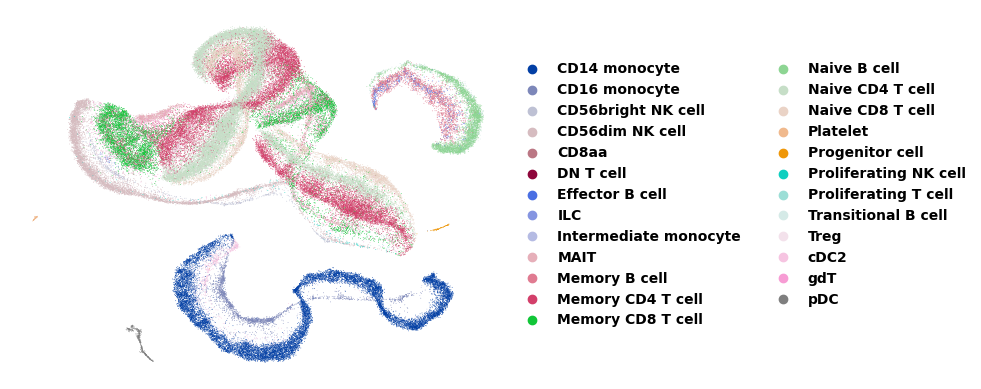

In [54]:
# Visualise the embeddings
from mmcontext.pl import plot_umap
from mmcontext.utils import consolidate_low_frequency_categories

current_key = label_key
adata_cut = consolidate_low_frequency_categories(adata, [current_key], threshold=50, remove=True)
emb_key = "mmcontext_emb"
plot_umap(
    adata,
    color_key=label_key,
    embedding_key=emb_key,
    save_format="svg",
    save_dir=f"figs/{model_name}/{dataset_name}",
    save_plot=False,
    title="",
)

<Figure size 800x800 with 0 Axes>

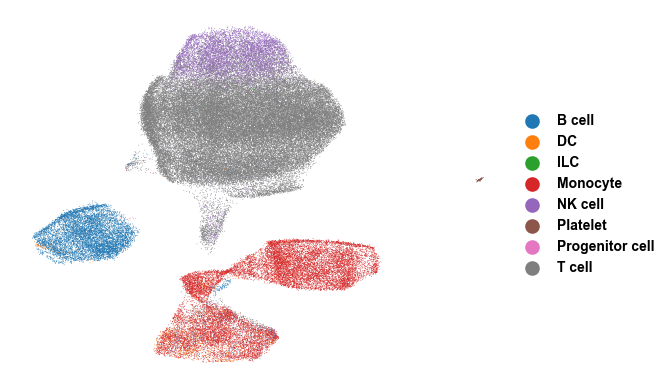

In [24]:
# Visualise the embeddings
from mmcontext.pl import plot_umap
from mmcontext.utils import consolidate_low_frequency_categories

current_key = label_key
adata_cut = consolidate_low_frequency_categories(adata, [current_key], threshold=1, remove=False)
emb_key = layer_key
plot_umap(
    adata_cut,
    color_key=label_key,
    embedding_key=emb_key,
    save_format="svg",
    nametag="",
    save_dir=f"figs/{model_name}/{dataset_name}",
    save_plot=False,
    title="",
)

In [62]:
from mmcontext.eval import get

EvClass = get("LabelSimilarity")
ev = EvClass(
    auto_filter_labels=False,
    umap_n_neighbors=15,
    umap_min_dist=0.5,
    similarity="cosine",
    logit_scale=1,
    score_norm_method=None,
)

In [63]:
# precompute umap coordinates to reuse on subset
full_omics_embeddings = adata.obsm["mmcontext_emb"]

In [302]:
# full_cell_umap = ev._compute_umap(full_omics_embeddings)
# add umap coordinates to adata
# adata.obsm["cell_umap"] = full_cell_umap

In [64]:
full_query_labels = adata.obs[label_key].unique().tolist()
full_label_embeddings = model.encode(full_query_labels)
full_true_labels = adata.obs[label_key]

In [65]:
from pathlib import Path

result = ev.compute(
    omics_embeddings=full_omics_embeddings,
    label_embeddings=full_label_embeddings,
    query_labels=full_query_labels,
    true_labels=full_true_labels,
    label_key=label_key,
    out_dir=Path(f"LabelSimilarity/{model_name}/{dataset_name}"),  # Pass output directory for caching
)

/Users/mengerj/repos/mmcontext/src/mmcontext/eval/label_similarity.py:76: RuntimeWarning: divide by zero encountered in matmul
  return (emb1_norm @ emb2_norm.T).astype(np.float32)
/Users/mengerj/repos/mmcontext/src/mmcontext/eval/label_similarity.py:76: RuntimeWarning: overflow encountered in matmul
  return (emb1_norm @ emb2_norm.T).astype(np.float32)
/Users/mengerj/repos/mmcontext/src/mmcontext/eval/label_similarity.py:76: RuntimeWarning: invalid value encountered in matmul
  return (emb1_norm @ emb2_norm.T).astype(np.float32)


In [66]:
result

B cell/auc: 0.9986
B cell/accuracy: 0.9965
DC/auc: 0.9537
DC/accuracy: 0.7147
ILC/auc: 0.9702
ILC/accuracy: 0.0000
Monocyte/auc: 0.9997
Monocyte/accuracy: 0.9955
NK cell/auc: 0.9989
NK cell/accuracy: 0.9659
Platelet/auc: 1.0000
Platelet/accuracy: 1.0000
Progenitor cell/auc: 0.9999
Progenitor cell/accuracy: 1.0000
T cell/auc: 0.9955
T cell/accuracy: 0.4880
mean_auc: 0.9896
std_auc: 0.0165
accuracy: 0.6606
balanced_accuracy: 0.7701
random_baseline_accuracy: 0.1250
accuracy_over_random: 5.2850
n_labels: 8

In [67]:
ev.plot(
    omics_embeddings=full_omics_embeddings,
    # cell_umap=full_cell_umap,
    out_dir=Path(f"LabelSimilarity/{model_name}/{dataset_name}/{label_key}_combined"),
    label_embeddings=full_label_embeddings,
    query_labels=full_query_labels,
    true_labels=full_true_labels,
    label_key=label_key,  # column name (e.g. "celltype")
    save_format="png",
    figsize=(4, 4),
    dpi=600,
    font_size=12,
    font_style="normal",
    font_weight="normal",
    legend_fontsize=54,
    axis_label_size=20,
    axis_tick_size=12,
    point_size=0.5,
    legend_layout="vertical",
    legend_point_size=20,
    text_dot_fill_color="black",
    text_dot_edge_color="label",
    text_dot_alpha=0.2,
    umap_method="combined",
)

/Users/mengerj/repos/mmcontext/src/mmcontext/eval/label_similarity.py:76: RuntimeWarning: divide by zero encountered in matmul
  return (emb1_norm @ emb2_norm.T).astype(np.float32)
/Users/mengerj/repos/mmcontext/src/mmcontext/eval/label_similarity.py:76: RuntimeWarning: overflow encountered in matmul
  return (emb1_norm @ emb2_norm.T).astype(np.float32)
/Users/mengerj/repos/mmcontext/src/mmcontext/eval/label_similarity.py:76: RuntimeWarning: invalid value encountered in matmul
  return (emb1_norm @ emb2_norm.T).astype(np.float32)
/Users/mengerj/repos/mmcontext/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/mengerj/repos/mmcontext/src/mmcontext/eval/label_similarity.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/Users/mengerj/repos/mmcontext/src/mmcontext/e

In [70]:
# Option to subset adata based on one or more label values (e.g., "Monocyte" and "DC")
subset_label_values = ["T cell"]  # Change this list to your desired label values
subset_label_key = "AIFI_L1"
annotation_label_key = "AIFI_L2"
# Subset the AnnData object for any of the specified label values
adata_subset = adata[adata.obs[subset_label_key].isin(subset_label_values)].copy()
subset_labels = adata_subset.obs[annotation_label_key].values.unique()
label_embeddings_subset = model.encode(subset_labels)
# Create a new LabelSimilarity evaluator instance
# ev_subset = EvClass(auto_filter_labels=False, umap_n_neighbors=15, umap_min_dist=0.5)
subset_label_string = "_".join(subset_label_values)
subset_omics_embeddings = adata_subset.obsm["mmcontext_emb"]
# subset_umap_coords = adata_subset.obsm["cell_umap"]
# ev_subset.eb_lfdr_q = 0.01
# Compute metrics on the subsetted data
result_subset = ev.compute(
    omics_embeddings=subset_omics_embeddings,
    label_embeddings=label_embeddings_subset,
    query_labels=subset_labels,
    true_labels=adata_subset.obs[annotation_label_key],
    label_key=annotation_label_key,
    out_dir=Path(
        f"LabelSimilarity/{model_name}/{dataset_name}/{annotation_label_key}_subset_{subset_label_string}/results"
    ),
)

# Plot results for the subset
ev.plot(
    omics_embeddings=subset_omics_embeddings,
    #    cell_umap=subset_umap_coords,
    out_dir=Path(
        f"LabelSimilarity/{model_name}/{dataset_name}/{annotation_label_key}_subset_{subset_label_string}_combined"
    ),
    label_embeddings=label_embeddings_subset,
    query_labels=subset_labels,
    true_labels=adata_subset.obs[annotation_label_key],
    label_key=annotation_label_key,
    save_format="png",
    figsize=(4, 4),
    dpi=600,
    font_size=12,
    axis_tick_size=12,
    font_style="normal",
    font_weight="normal",
    legend_fontsize=54,
    axis_label_size=20,
    point_size=0.5,
    legend_layout="vertical",
    legend_point_size=20,
    text_dot_fill_color="black",
    text_dot_edge_color="label",
    text_dot_alpha=0.4,
    umap_method="combined",
)

/Users/mengerj/repos/mmcontext/src/mmcontext/eval/label_similarity.py:76: RuntimeWarning: divide by zero encountered in matmul
  return (emb1_norm @ emb2_norm.T).astype(np.float32)
/Users/mengerj/repos/mmcontext/src/mmcontext/eval/label_similarity.py:76: RuntimeWarning: overflow encountered in matmul
  return (emb1_norm @ emb2_norm.T).astype(np.float32)
/Users/mengerj/repos/mmcontext/src/mmcontext/eval/label_similarity.py:76: RuntimeWarning: invalid value encountered in matmul
  return (emb1_norm @ emb2_norm.T).astype(np.float32)
/Users/mengerj/repos/mmcontext/src/mmcontext/eval/label_similarity.py:76: RuntimeWarning: divide by zero encountered in matmul
  return (emb1_norm @ emb2_norm.T).astype(np.float32)
/Users/mengerj/repos/mmcontext/src/mmcontext/eval/label_similarity.py:76: RuntimeWarning: overflow encountered in matmul
  return (emb1_norm @ emb2_norm.T).astype(np.float32)
/Users/mengerj/repos/mmcontext/src/mmcontext/eval/label_similarity.py:76: RuntimeWarning: invalid value enco

In [69]:
result_subset

CD8aa/auc: 0.7231
CD8aa/accuracy: 0.0000
DN T cell/auc: 0.4027
DN T cell/accuracy: 0.0000
MAIT/auc: 0.9151
MAIT/accuracy: 0.0000
Memory CD4 T cell/auc: 0.8933
Memory CD4 T cell/accuracy: 0.8253
Memory CD8 T cell/auc: 0.9080
Memory CD8 T cell/accuracy: 0.8940
Naive CD4 T cell/auc: 0.8710
Naive CD4 T cell/accuracy: 0.8027
Naive CD8 T cell/auc: 0.9124
Naive CD8 T cell/accuracy: 0.9197
Proliferating T cell/auc: 0.9876
Proliferating T cell/accuracy: 0.4286
Treg/auc: 0.8976
Treg/accuracy: 0.5911
gdT/auc: 0.8419
gdT/accuracy: 0.0004
mean_auc: 0.8353
std_auc: 0.1578
accuracy: 0.7605
balanced_accuracy: 0.4462
random_baseline_accuracy: 0.1000
accuracy_over_random: 7.6051
n_labels: 10

In [ ]:
from mmcontext.eval.query_annotate import OmicsQueryAnnotator

annotator = OmicsQueryAnnotator(model)
annotator.annotate_omics_data(adata, full_query_labels, emb_key="mmcontext_emb")

/Users/mengerj/repos/mmcontext/src/mmcontext/eval/query_annotate.py:112: RuntimeWarning: divide by zero encountered in matmul
  similarity_matrix = data_emb @ label_emb.T
/Users/mengerj/repos/mmcontext/src/mmcontext/eval/query_annotate.py:112: RuntimeWarning: overflow encountered in matmul
  similarity_matrix = data_emb @ label_emb.T
/Users/mengerj/repos/mmcontext/src/mmcontext/eval/query_annotate.py:112: RuntimeWarning: invalid value encountered in matmul
  similarity_matrix = data_emb @ label_emb.T


In [163]:
# get accuracy of best label vs true label
from sklearn.metrics import accuracy_score

accuracy_score(adata.obs["best_label"], adata.obs[label_key])

0.42632695122315484

In [159]:
if dataset_name == "human_immune_health_atlas_50k_single_no_caption":
    df = pd.read_csv("../../data/queries/additional_combined.csv")
    labels = df["Cell Type"]
    Definition = df["Definition"]
    from mmcontext.eval.query_annotate import OmicsQueryAnnotator
    from mmcontext.pl.plotting import plot_query_scores_with_labels_umap

    annotator = OmicsQueryAnnotator(model)
    annotator.query_with_text(adata, Definition, emb_key="mmcontext_emb")
    # Call the plotting function
    plot_query_scores_with_labels_umap(
        adata=adata,
        queries=Definition,
        labels=labels,
        label_key="AIFI_L2",
        save_dir=f"figs/{model_name}/{dataset_name}/umap_with_labels",
        nametag="",
        figsize=(4, 4),
        point_size=2,
        dpi=300,  # Lower DPI for faster generation
        axis_label_size=18,
        axis_tick_size=18,
    )

/Users/mengerj/repos/mmcontext/src/mmcontext/eval/query_annotate.py:179: RuntimeWarning: divide by zero encountered in matmul
  similarity_matrix = query_emb @ data_emb.T
/Users/mengerj/repos/mmcontext/src/mmcontext/eval/query_annotate.py:179: RuntimeWarning: overflow encountered in matmul
  similarity_matrix = query_emb @ data_emb.T
/Users/mengerj/repos/mmcontext/src/mmcontext/eval/query_annotate.py:179: RuntimeWarning: invalid value encountered in matmul
  similarity_matrix = query_emb @ data_emb.T
/Users/mengerj/repos/mmcontext/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [79]:
from mmcontext.eval.utils import create_emb_pair_dataframe

emb_pair_df = create_emb_pair_dataframe(
    adata,
    embedding_dict={"omics": "mmcontext_emb", "text": "mmcontext_text_emb"},
    subset_size=20,
    label_keys=[batch_key, label_key],
)

/Users/mengerj/repos/mmcontext/src/mmcontext/eval/utils.py:208: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row[label_key] = adata.obs[label_key][sampled_indices[idx]]


Requested n_samples (50) is greater than total unique sample_ids (20). Using all sample_ids instead.
/Users/mengerj/repos/mmcontext/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


<Figure size 6000x6000 with 0 Axes>

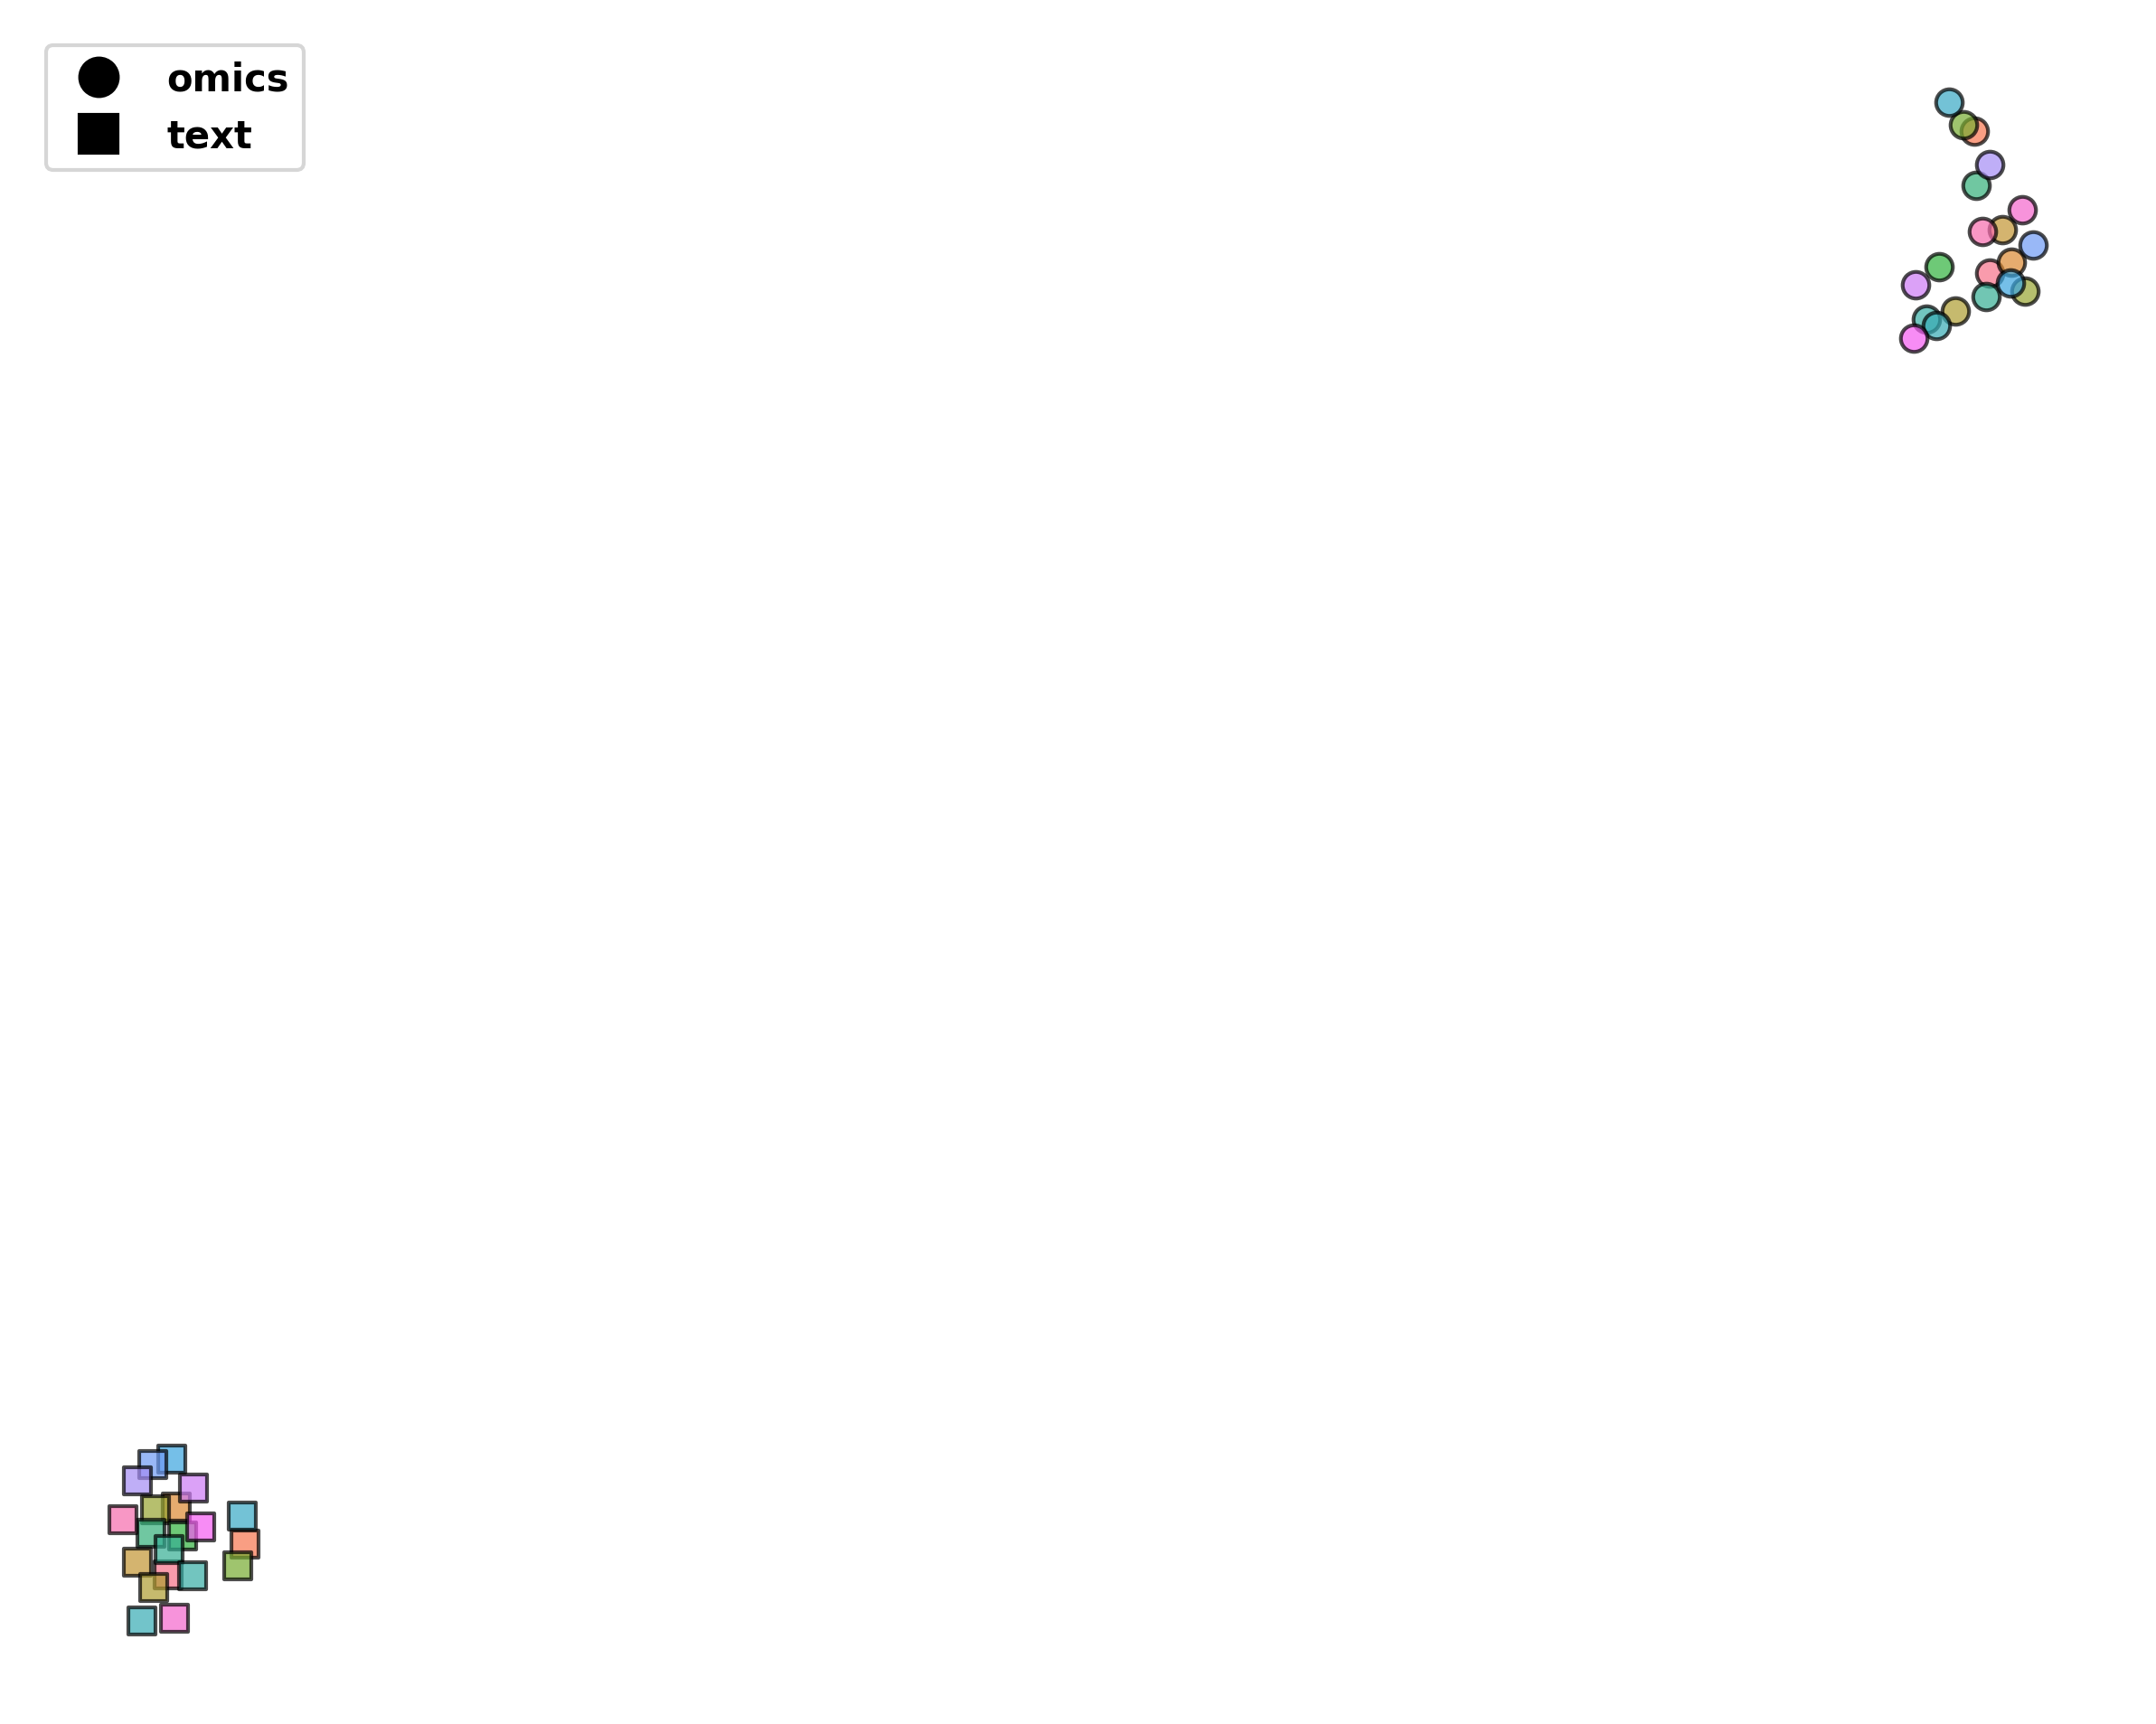

In [58]:
from mmcontext.pl import visualize_embedding_clusters

visualize_embedding_clusters(emb_pair_df, method="umap", metric="cosine", n_neighbors=15, min_dist=0.1, random_state=42)

/Users/mengerj/repos/mmcontext/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/mengerj/repos/mmcontext/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/mengerj/repos/mmcontext/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


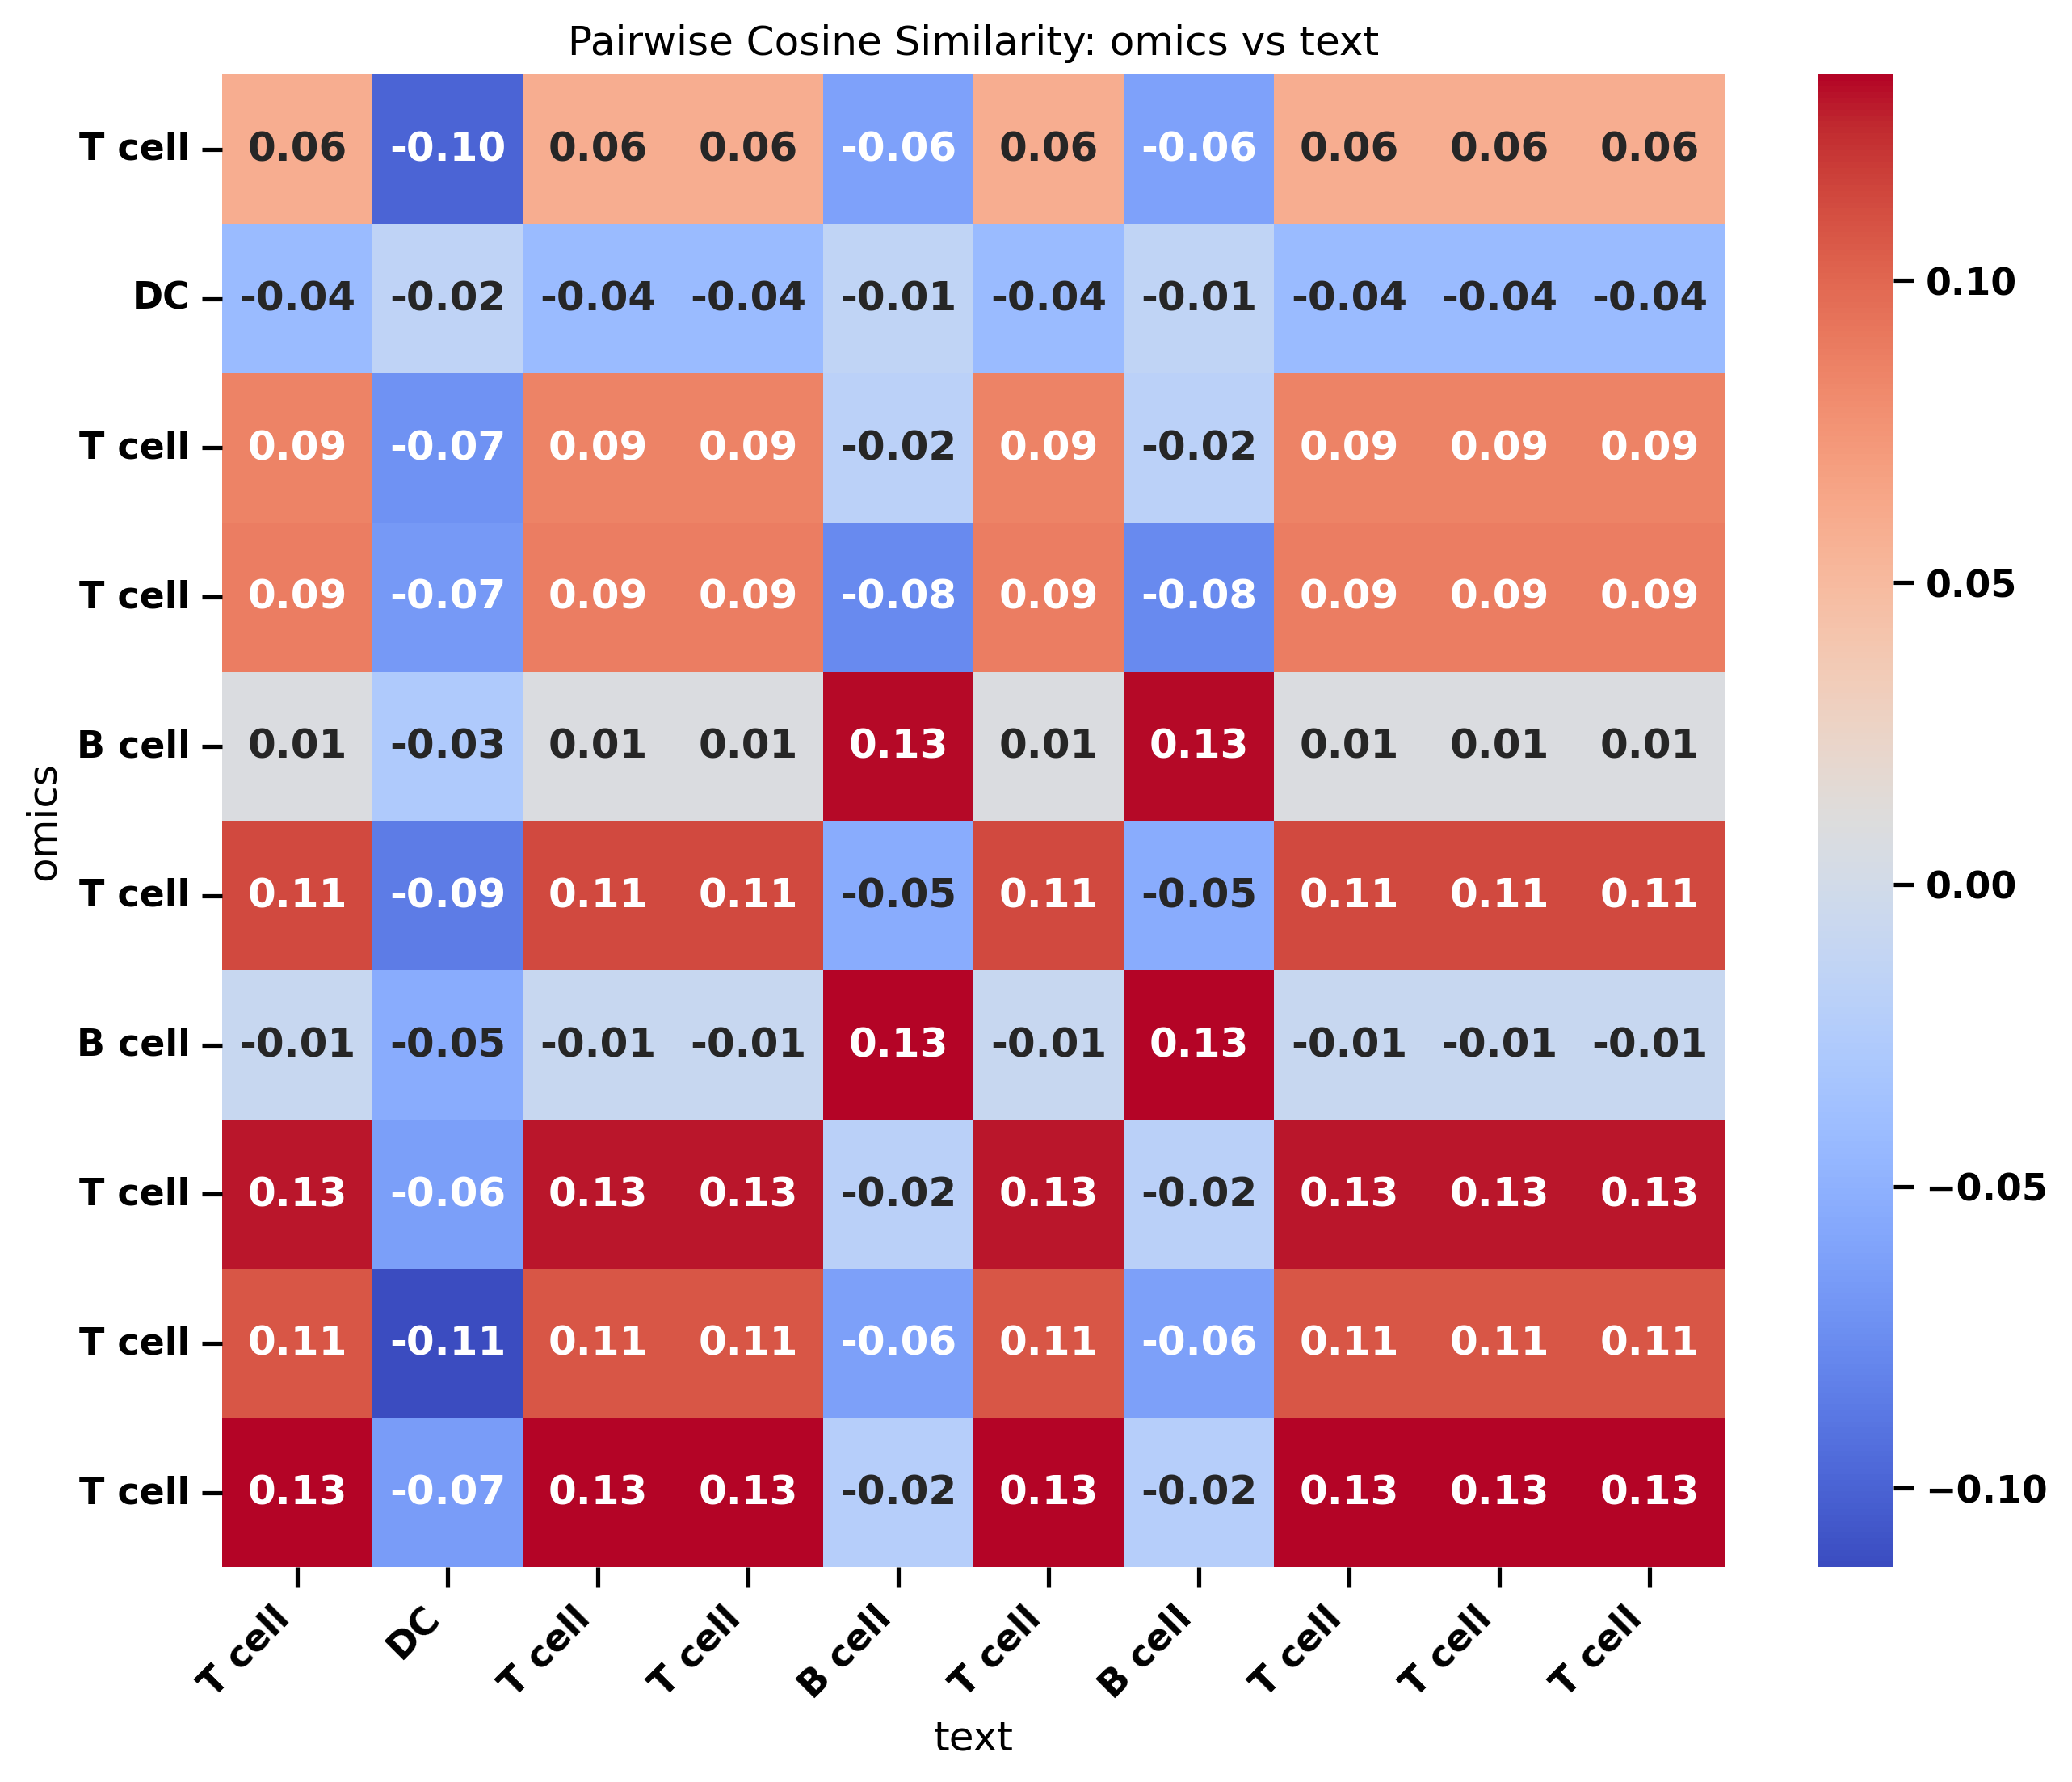

In [59]:
from mmcontext.pl.plotting import plot_embedding_similarity

plot_embedding_similarity(emb_pair_df, emb1_type="omics", emb2_type="text", label_key=label_key)

/Users/mengerj/repos/mmcontext/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/mengerj/repos/mmcontext/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/mengerj/repos/mmcontext/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


<Figure size 3000x2400 with 0 Axes>

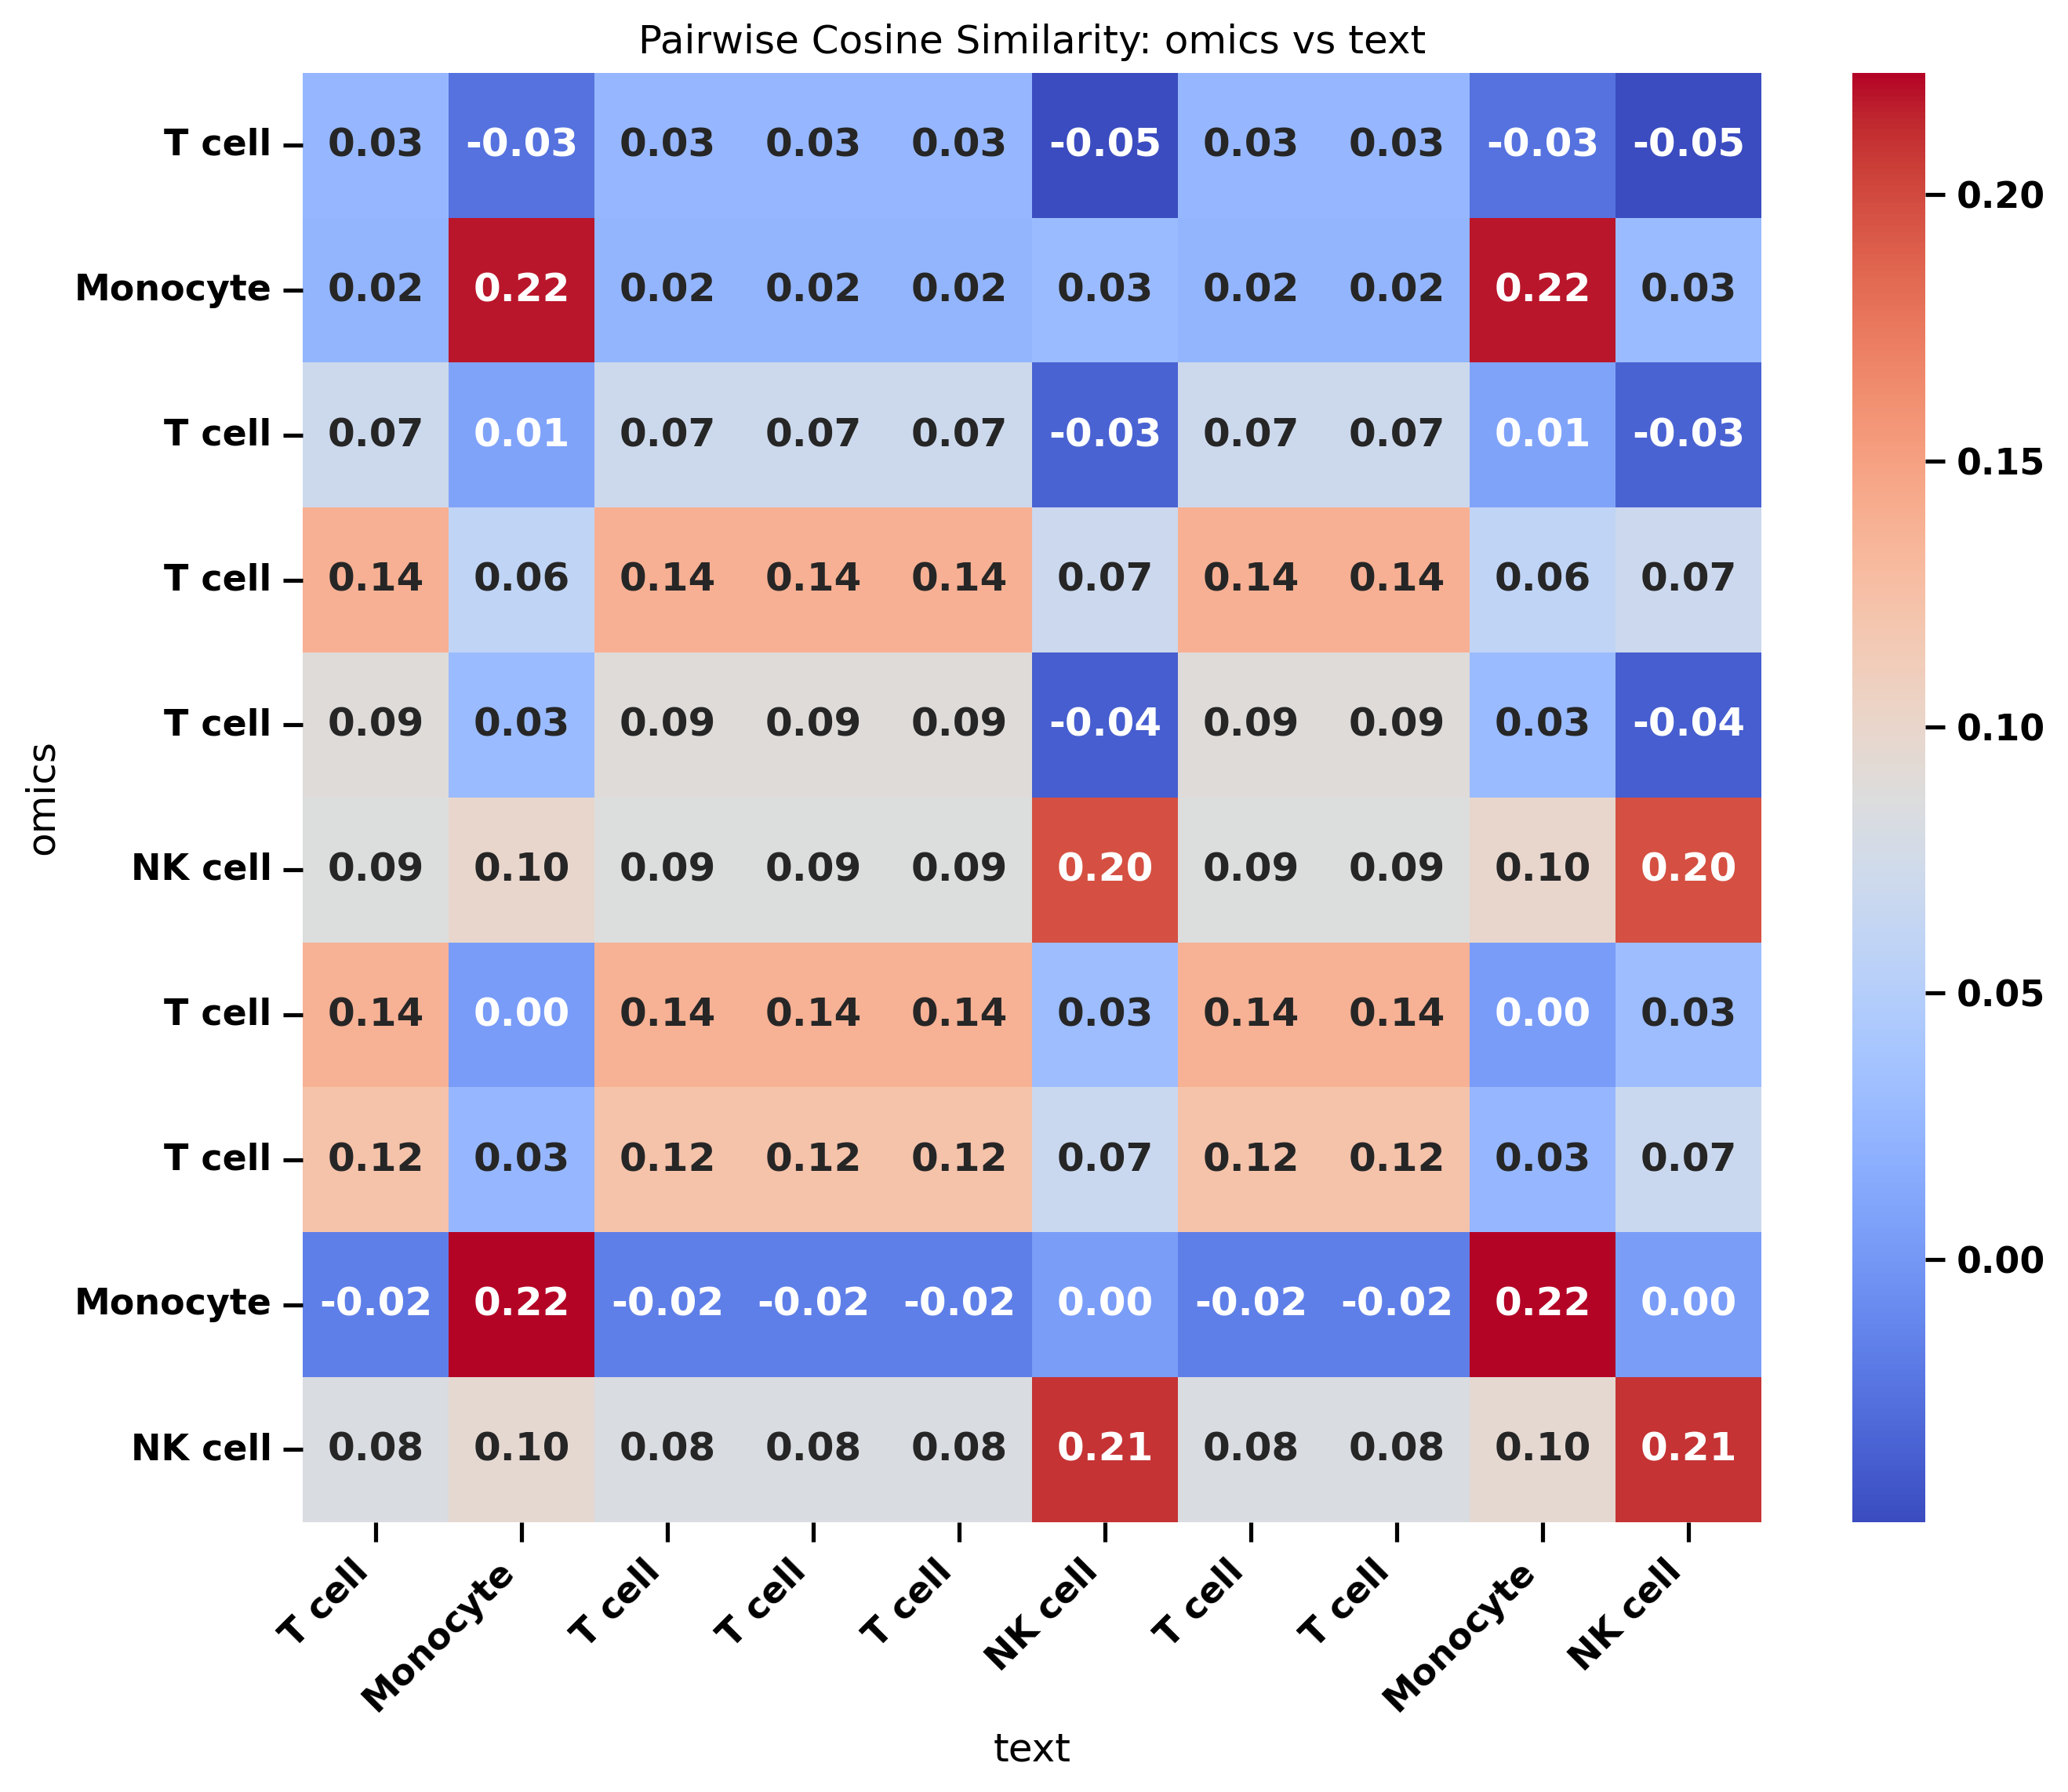

In [154]:
from mmcontext.pl.plotting import plot_embedding_similarity

plot_embedding_similarity(emb_pair_df, emb1_type="omics", emb2_type="text", label_key=label_key)

/Users/mengerj/repos/mmcontext/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/mengerj/repos/mmcontext/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/mengerj/repos/mmcontext/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


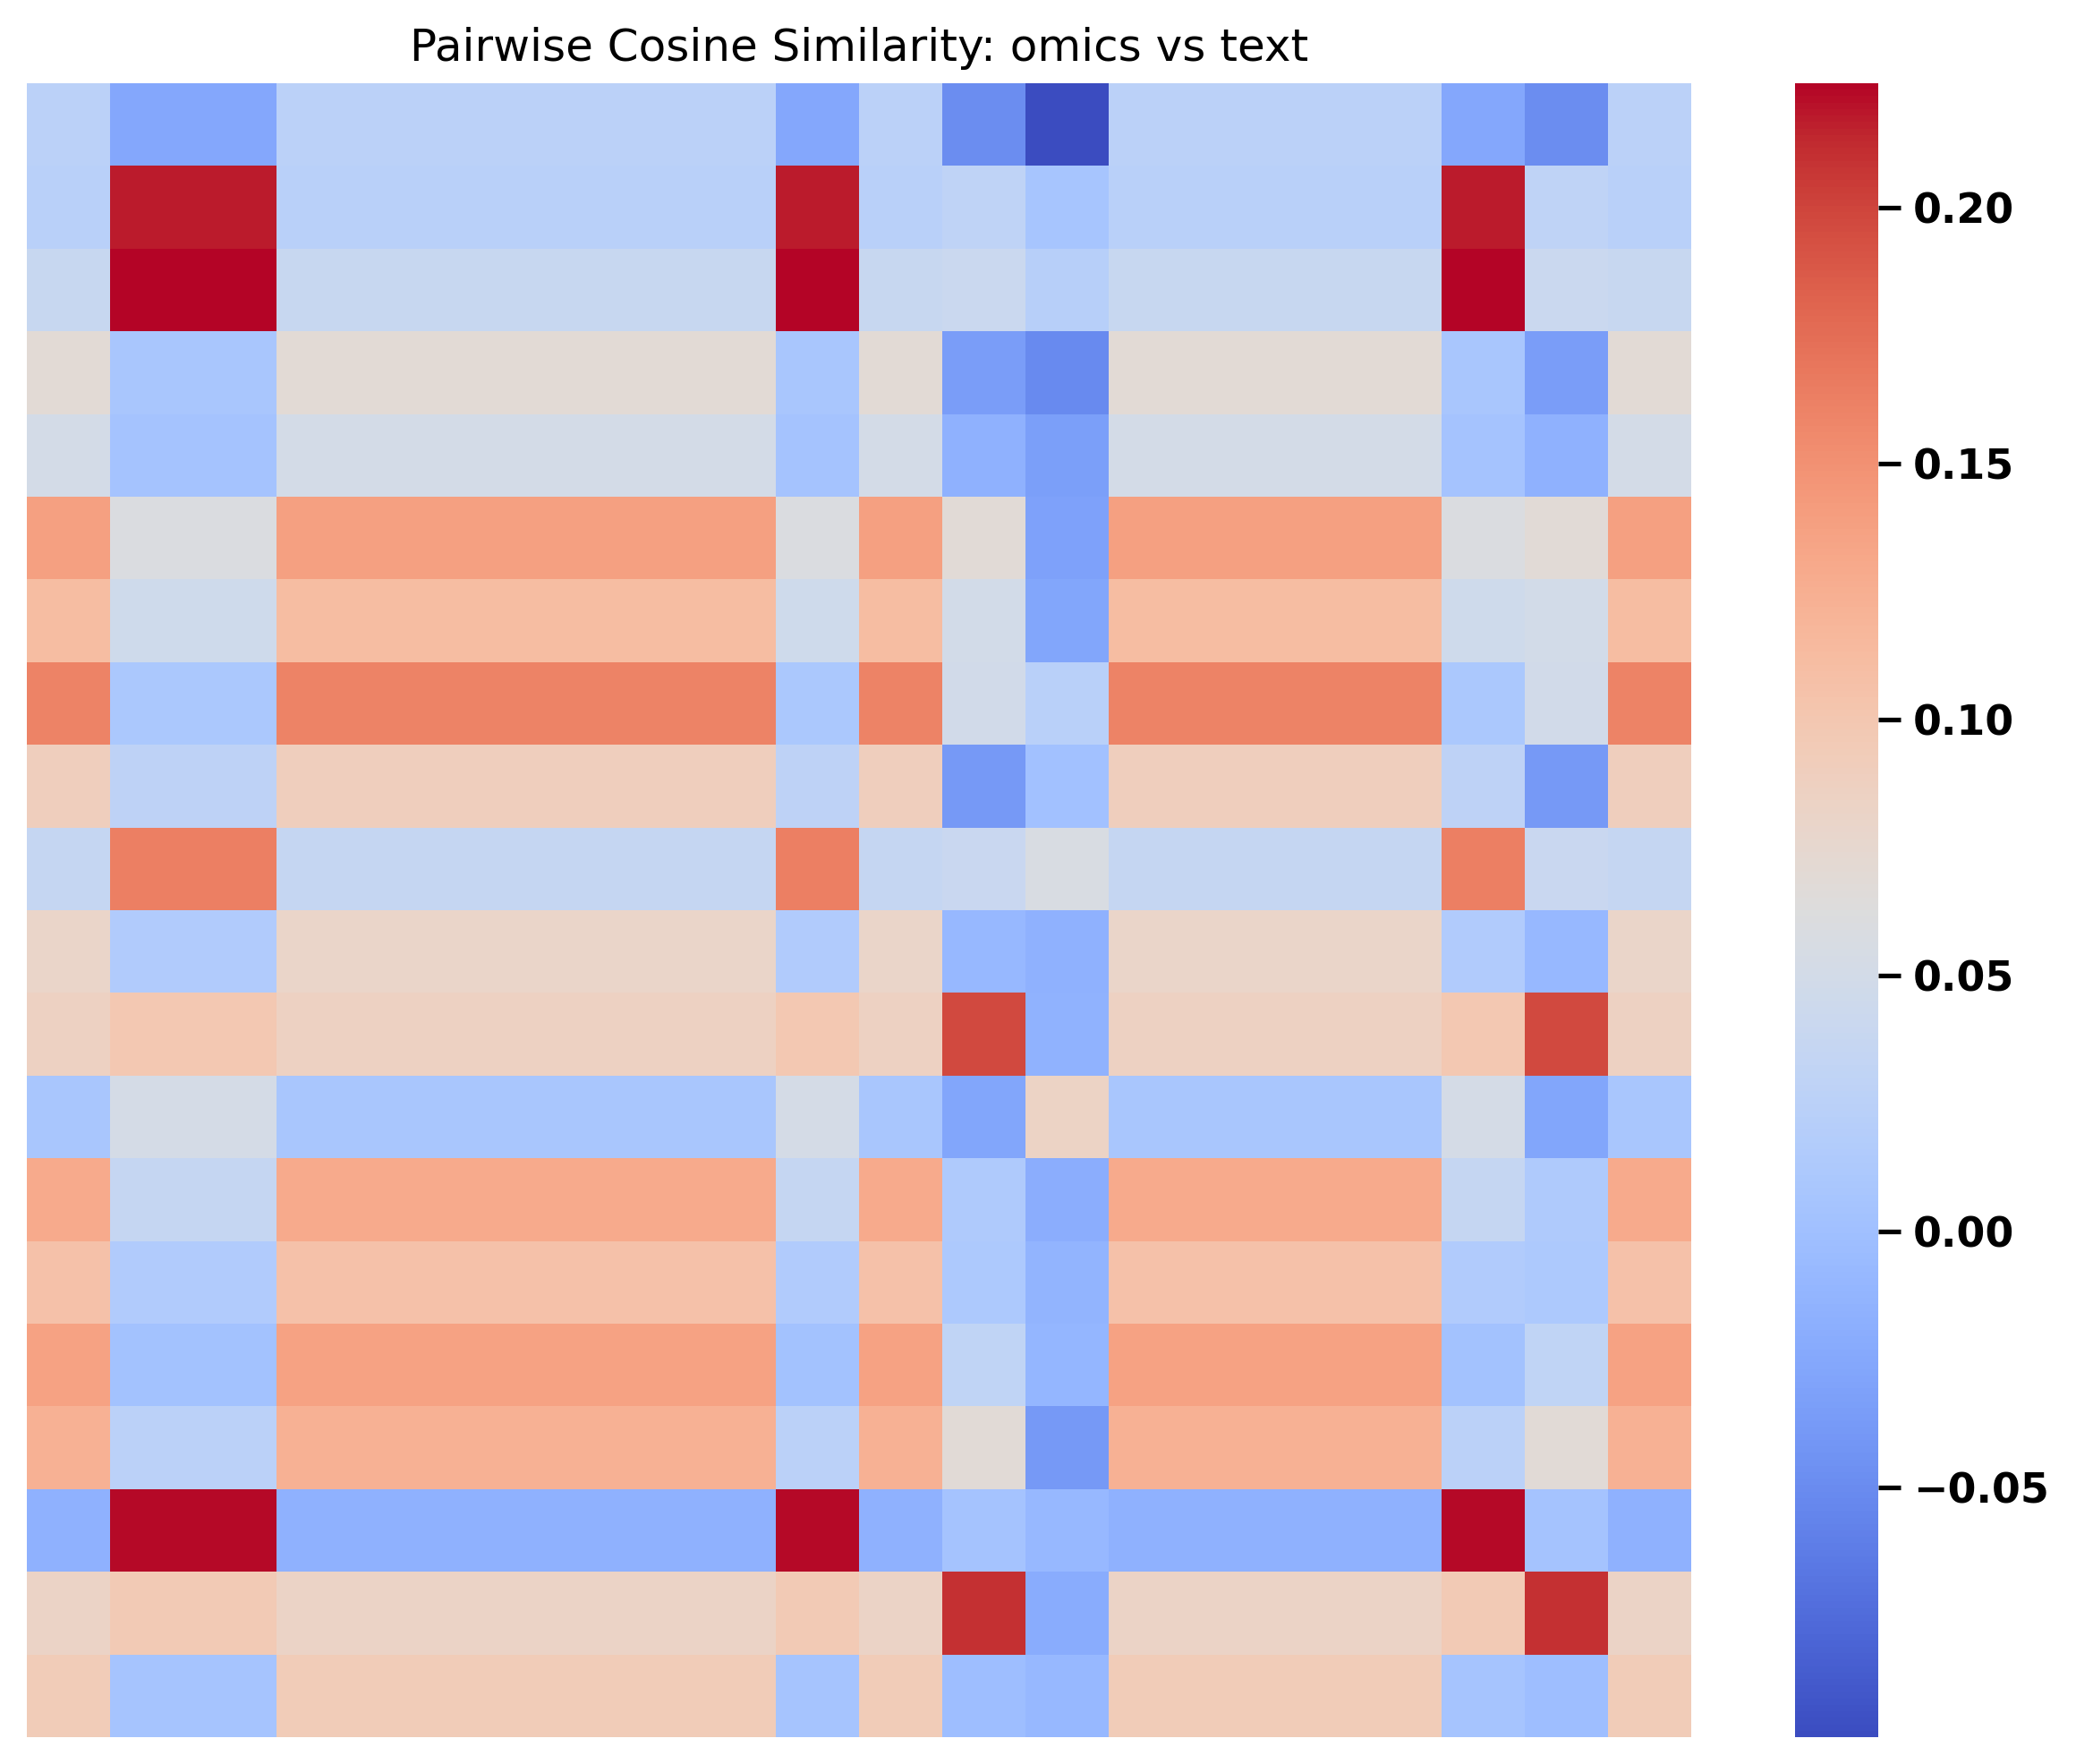

In [158]:
from mmcontext.pl.plotting import plot_embedding_similarity

plot_embedding_similarity(emb_pair_df, emb1_type="omics", emb2_type="text", n_samples=100)

In [1]:
from mmcontext.pp import remove_zero_variance_cells, remove_zero_variance_genes

adata = remove_zero_variance_cells(adata)
adata = remove_zero_variance_genes(adata)

/Users/mengerj/repos/mmcontext/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'adata' is not defined

In [42]:
from mmcontext.eval import scibEvaluator

evalutator = scibEvaluator(
    adata=adata,
    batch_key="batch",
    label_key="cluster_lavel",
    embedding_key=["mmcontext_emb", "mmcontext_text_emb", "X_geneformer", "X_hvg", "X_pca", "X_scvi"],
    n_top_genes=5000,
    max_cells=5000,
)
res = evalutator.evaluate()

HVG


Error in data reduction: Bin edges must be unique: Index([               -inf,  -2.892823703725029, -0.6085385346302277,
       0.09924078048896734, 0.09924078048896734, 0.09924079373444396,
       0.14027225325936107, 0.18885910880786402, 0.23705809401106778,
          0.30732003013017,  0.4241397468442167,   0.611900446591554,
        0.9100024470921467,  1.3157359159517066,  1.9957290970961805,
         2.822801220996513,   3.787105232711744,    5.15218205363662,
         7.423641985710012,  100.20904103227615,                 inf],
      dtype='float64').
You can drop duplicate edges by setting the 'duplicates' kwarg
Using full data for metrics computation.


HVG
Cluster for cluster_0.2 with leiden


KeyError: 'No "neighbors" in .uns'